In [9]:
"""Homework 2"""
import numpy as np
import matplotlib.pyplot as plt

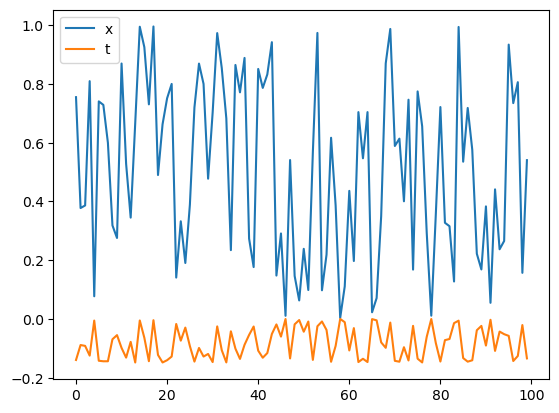

In [10]:
"""Task 1 Building your data set"""
x = np.random.random(100)
t = [i**3-i**2 for i in x]

fig, ax = plt.subplots()
ax.plot(x)
ax.plot(t)
ax.legend(labels=("x","t"))
plt.show()

In [11]:
"""Activation & loss functions + their derivatives"""

def ReLU(x):
    return x * (x > 0)

def ReLU_prime(x):
    return 1 * (x > 0)

def mse(output, target):
    return np.power(output-target, 2) / 2

def mse_prime(output, target):
    return target - output

In [12]:
"""Task 2 Perceptrons"""

class Layer:

    # for gradient descent
    learning_rate = 0.04

    def __init__(self, n_units, input_units):
        self.n_units = n_units
        self.input_units = input_units
        self.bias = np.zeros((1, n_units))
        self.weights = np.random.uniform(size=(input_units, n_units))

        # column vectors 
        self.l_input = None 
        self.l_preactivation = None 
        self.l_activation = None


    def forward_step(self, input):
        """Computes net-input & activation"""
        self.l_input = input
        # print("---------------------")
        # print(f"shape input = {self.l_input.shape} \n shape weights = {self.weights.shape} \n shape bias = {self.bias.shape}")
        self.l_preactivation = (self.l_input @ self.weights) + self.bias  

        self.l_activation = ReLU(self.l_preactivation)
    
        # input for l+1
        return self.l_activation
    

    def backward_step(self, dL_da):
        """Computes gradient descent"""
        
        da_dd = ReLU_prime(self.l_preactivation)

        
        # print("---------------------")
        # print(f"shape transpose l_input: {self.l_input.shape} \n shape of np.mult(da_dd, dL_da): {(np.multiply(da_dd, dL_da)).shape}")

        # weight and bias gradients
        dL_dW = self.l_input.reshape(-1,1) @ np.multiply(da_dd, dL_da) 
        dL_db = np.multiply(da_dd, dL_da)

        # print("shape transpose weights:", self.weights.shape, "\n shape dL_db:", dL_db.shape)
        
        # dL_da of l-1
        dL_dinput = dL_db @ np.transpose(self.weights) 

        # updating weights and biases
        self.weights = self.weights - self.learning_rate*dL_dW
        self.bias = self.bias - self.learning_rate*dL_db

        return dL_dinput

In [13]:
"""Task 3 Multi-Layer Perceptron"""

class MLP:
    
    def __init__(self):
        self.loss = None
        self.output = None
        self.layers_list = []

    # combining layers
    def add(self, layer):
        self.layers_list.append(layer)

    def forwardprop(self, nn_input):
        self.output = nn_input
        # passing inputs/activations to next layers until output is reached
        for layer in self.layers_list:
            self.output = layer.forward_step(self.output)

    def backprop(self, target):
        self.loss = mse(self.output, target)
        dL_da = mse_prime(self.output, target)

        for layer in reversed(self.layers_list):
            dL_da = layer.backward_step(dL_da)

In [14]:
"""Task 4 Training"""

network_input = np.reshape(x, (1,-1))
l_1 = Layer(10, network_input.size)
output_layer = Layer(1,10)

mlp = MLP()

mlp.add(l_1)
mlp.add(output_layer)

history_loss = []
history_avg_loss = []
epochs = 1000
for i in range(epochs):

    for input,target in zip(network_input, t):
        mlp.forwardprop(input)
        mlp.backprop(target)
        history_loss.append(mse(mlp.output, target))
    history_avg_loss.append(np.mean(history_loss))
    history_loss.clear()

/tmp/ipykernel_650/74889335.py:25: RuntimeWarning: overflow encountered in matmul
  self.l_preactivation = (self.l_input @ self.weights) + self.bias


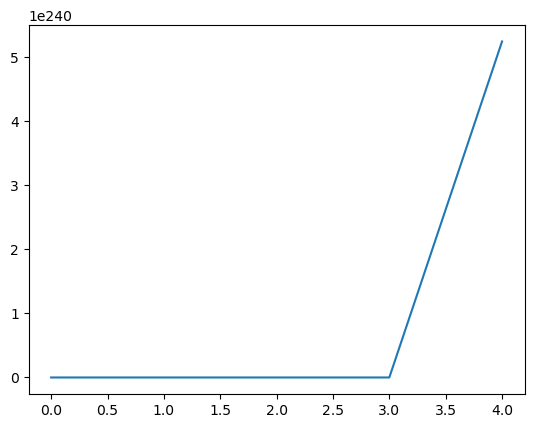

In [15]:
"""Task 5 Visualization"""
fig,ax = plt.subplots()
ax.plot([i for i in range(epochs)], history_avg_loss)
plt.show()